# 1. Load the dataset into python environment

In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Make ‘PassengerId’ as the index column

In [56]:
data = pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

# 3. Check the basic details of the dataset

In [57]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [61]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 4. Fill in all the missing values present in all the columns in the dataset

In [62]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [63]:
for col in ['Age','Embarked']:
    data[col] = data[col].fillna(data[col].median())

In [64]:
data.drop(['Name', 'Ticket','Cabin'], axis = 1, inplace = True)#too many missing values

In [65]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2.0
2,1,1,1,38.0,1,0,71.2833,0.0
3,1,3,1,26.0,0,0,7.9250,2.0
4,1,1,1,35.0,1,0,53.1000,2.0
5,0,3,0,35.0,0,0,8.0500,2.0


In [66]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot of Fare')

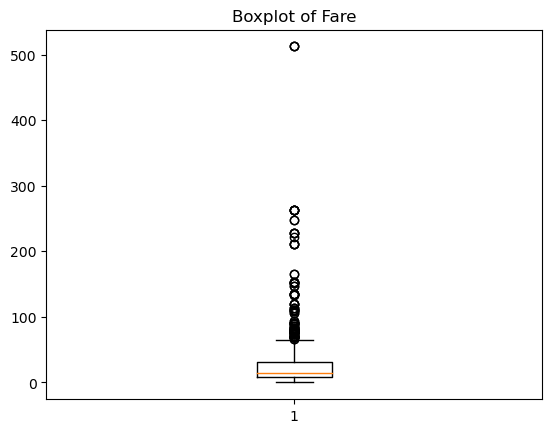

In [67]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

In [68]:
Q1_1 = np.percentile(data['Fare'], 25 , interpolation='midpoint')
Q2_1 = np.percentile(data['Fare'], 50 , interpolation='midpoint')
Q3_1 = np.percentile(data['Fare'], 75 , interpolation='midpoint')
print(Q1_1)
print(Q2_1)
print(Q3_1)

7.9104
14.4542
31.0


In [69]:
IQR_1 = Q3_1 - Q1_1
print(IQR_1)

23.0896


In [70]:
low_lim_1 = Q1_1 - 1.5 * IQR_1
up_lim_1 = Q3_1 + 1.5 * IQR_1
print(low_lim_1)
print(up_lim_1)

-26.724
65.6344


In [71]:
outlier_1 = []
for x in data['Fare']:
    if((x>up_lim_1) or (x<low_lim_1)):
        outlier_1.append(x)

In [72]:
outlier_1

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [73]:
data.shape

(891, 8)

In [74]:
len(outlier_1)

116

Text(0.5, 1.0, 'Boxplot of Age')

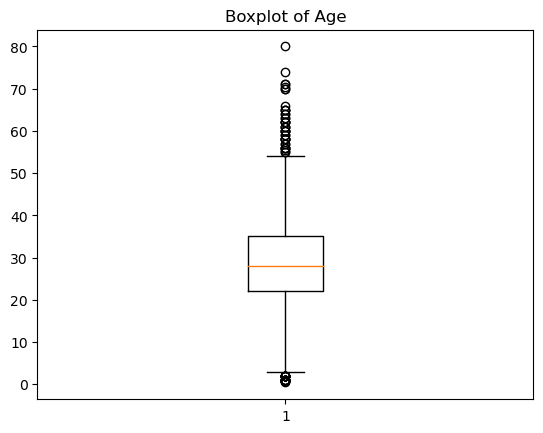

In [75]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

In [76]:
Q1_2 = np.percentile(data['Age'], 25 , interpolation='midpoint')
Q2_2 = np.percentile(data['Age'], 50 , interpolation='midpoint')
Q3_2 = np.percentile(data['Age'], 75 , interpolation='midpoint')
print(Q1_2)
print(Q2_2)
print(Q3_2)

22.0
28.0
35.0


In [77]:
IQR_2 = Q3_2 - Q1_2
print(IQR_2)

13.0


In [78]:
low_lim_2 = Q1_2 - 1.5 * IQR_2
up_lim_2 = Q3_2 + 1.5 * IQR_2
print(low_lim_2)
print(up_lim_2)

2.5
54.5


In [79]:
outlier_2 = []
for x in data['Age']:
    if((x>up_lim_2) or (x<low_lim_2)):
        outlier_2.append(x)

In [80]:
outlier_2

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [81]:
len(outlier_2)

66

Text(0.5, 1.0, 'Boxplot of Parch')

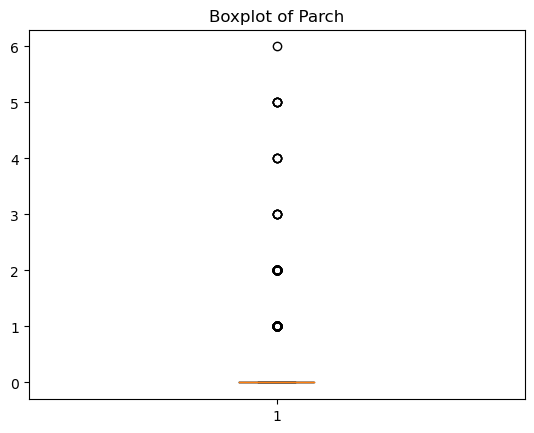

In [82]:
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch')

Text(0.5, 1.0, 'Boxplot of Pclass')

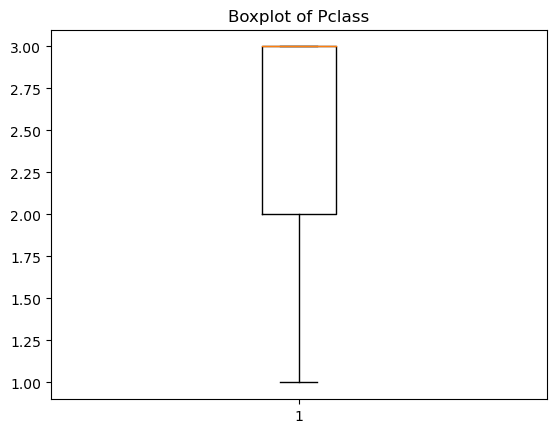

In [83]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [84]:
data_1 = data.drop('Fare', axis=1)
data_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,0,22.0,1,0,2.0
2,1,1,1,38.0,1,0,0.0
3,1,3,1,26.0,0,0,2.0
4,1,1,1,35.0,1,0,2.0
5,0,3,0,35.0,0,0,2.0


In [85]:
data_1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [86]:
X =data_1.drop('Survived', axis = 1)
Y = data_1['Survived']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE =', mean_squared_error(Y_test,predictions))
print('R2 =', r2_score(Y_test,predictions))

MSE = 0.13493917227030996
R2 = 0.4435539229455596


In [92]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [93]:
data_1 = min_max_scaler.fit_transform(data_1)

In [94]:
data_1 = pd.DataFrame(data_1, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'])

In [95]:
data_1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.352413,0.363679,0.065376,0.063599,0.768238
std,0.486592,0.418036,0.477990,0.163605,0.137843,0.134343,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.500000
50%,0.000000,1.000000,0.000000,0.346569,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2.0
2,1,1,1,38.0,1,0,71.2833,0.0
3,1,3,1,26.0,0,0,7.9250,2.0
4,1,1,1,35.0,1,0,53.1000,2.0
5,0,3,0,35.0,0,0,8.0500,2.0


In [97]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [98]:
data.drop([ 'Survived','Pclass', 'Age','Sex','SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

In [99]:
data = pd.concat([data,data_1], axis=1)

In [100]:
data.head()

,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,7.2500,1.0,0.0,1.0,0.472229,0.125,0.0,0.0
2,71.2833,1.0,1.0,1.0,0.321438,0.000,0.0,1.0
3,7.9250,1.0,0.0,1.0,0.434531,0.125,0.0,1.0
4,53.1000,0.0,1.0,0.0,0.434531,0.000,0.0,1.0
5,8.0500,0.0,1.0,0.0,0.346569,0.000,0.0,0.5


In [101]:
data.describe()

,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,32.204208,0.383838,0.654321,0.352413,0.363679,0.065376,0.063599,0.768238
std,49.693429,0.486592,0.418036,0.477990,0.163605,0.137843,0.134343,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.910400,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.500000
50%,14.454200,0.000000,1.000000,0.000000,0.346569,0.000000,0.000000,1.000000
75%,31.000000,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,1.000000
max,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
X =data_1.drop('Survived', axis = 1)
Y = data_1['Survived']

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

In [104]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE =', mean_squared_error(Y_test,predictions))
print('R2 =', r2_score(Y_test,predictions))

MSE = 0.13493917227031024
R2 = 0.4435539229455584
